In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('F:\Machine Learning\CSV file\Mall_Customers_Enhanced.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\HP\AppData\Local\Temp\ipykernel_14900\2960821947.py:1: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv('F:\Machine Learning\CSV file\Mall_Customers_Enhanced.csv')


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Group,Estimated Savings (k$),Credit Score,Loyalty Years,Preferred Category
0,1,Male,19,15,39,18-25,11.10,456,3,Budget
1,2,Male,21,15,81,18-25,6.90,300,6,Luxury
2,3,Female,20,16,6,18-25,15.36,594,2,Budget
3,4,Female,23,16,77,18-25,7.79,300,6,Luxury
4,5,Female,31,17,40,26-35,12.47,480,5,Budget


In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
label = LabelEncoder()
df.Gender = label.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Group,Estimated Savings (k$),Credit Score,Loyalty Years,Preferred Category
0,1,1,19,15,39,18-25,11.10,456,3,Budget
1,2,1,21,15,81,18-25,6.90,300,6,Luxury
2,3,0,20,16,6,18-25,15.36,594,2,Budget
3,4,0,23,16,77,18-25,7.79,300,6,Luxury
4,5,0,31,17,40,26-35,12.47,480,5,Budget


In [5]:
df['Preferred Category'] = label.fit_transform(df['Preferred Category'])
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Group,Estimated Savings (k$),Credit Score,Loyalty Years,Preferred Category
0,1,1,19,15,39,18-25,11.10,456,3,0
1,2,1,21,15,81,18-25,6.90,300,6,3
2,3,0,20,16,6,18-25,15.36,594,2,0


In [7]:
df = df.drop(['CustomerID'],axis='columns')
df.head(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Group,Estimated Savings (k$),Credit Score,Loyalty Years,Preferred Category
0,1,19,15,39,18-25,11.10,456,3,0
1,1,21,15,81,18-25,6.90,300,6,3
2,0,20,16,6,18-25,15.36,594,2,0


In [8]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Age Group                 4
Estimated Savings (k$)    0
Credit Score              0
Loyalty Years             0
Preferred Category        0
dtype: int64

In [9]:
df.shape

(200, 9)

In [10]:
df.dropna(subset=['Age Group'],inplace=True)
df.head(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Group,Estimated Savings (k$),Credit Score,Loyalty Years,Preferred Category
0,1,19,15,39,18-25,11.10,456,3,0
1,1,21,15,81,18-25,6.90,300,6,3
2,0,20,16,6,18-25,15.36,594,2,0


In [11]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Age Group                 0
Estimated Savings (k$)    0
Credit Score              0
Loyalty Years             0
Preferred Category        0
dtype: int64

In [12]:
X = df[['Age','Annual Income (k$)','Spending Score (1-100)','Estimated Savings (k$)']]

In [13]:
scaler = MinMaxScaler()

In [14]:
X_sca = scaler.fit_transform(X)

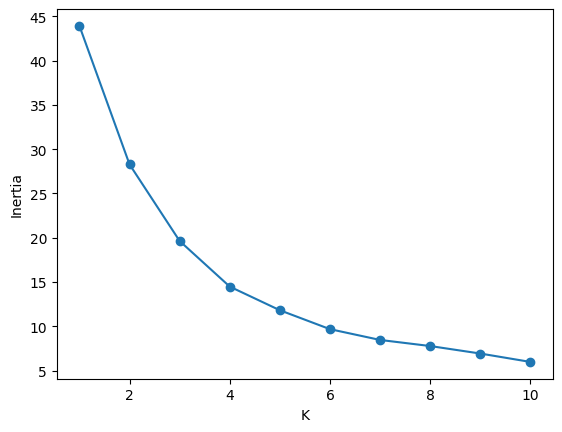

In [15]:
inertia = []
for k in range(1,11):
    km = KMeans(n_clusters=k,random_state=42)
    km.fit(X_sca)
    inertia.append(km.inertia_)

plt.plot(range(1,11),inertia,marker='o')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

In [16]:
Km = KMeans(n_clusters=6,random_state=42)
y_pred = km.fit_predict(X_sca)

df['Cluster'] = y_pred
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Group,Estimated Savings (k$),Credit Score,Loyalty Years,Preferred Category,Cluster
0,1,19,15,39,18-25,11.10,456,3,0,8
1,1,21,15,81,18-25,6.90,300,6,3,6
2,0,20,16,6,18-25,15.36,594,2,0,8
3,0,23,16,77,18-25,7.79,300,6,3,6
4,0,31,17,40,26-35,12.47,480,5,0,8


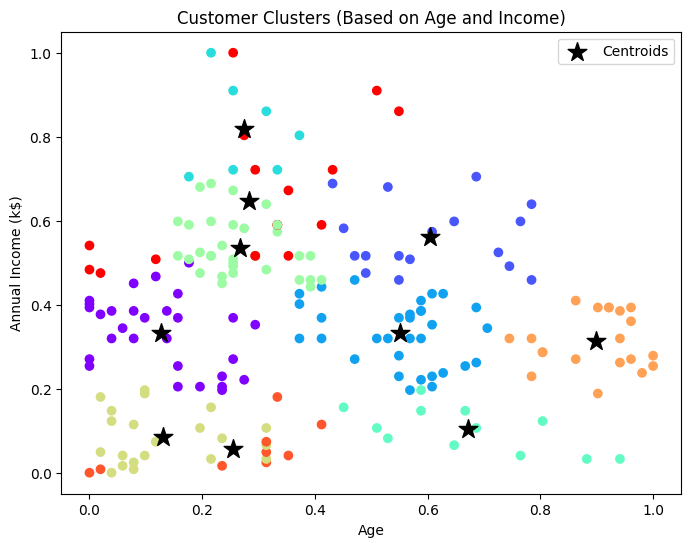

In [20]:
plt.figure(figsize=(8,6))
#plt.scatter(df['Age'], df['Annual Income (k$)'], c=df['Cluster'], cmap='rainbow')
plt.scatter(X_sca[:,0], X_sca[:,1], c=y_pred, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', s=200, label='Centroids')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Customer Clusters (Based on Age and Income)')
plt.legend()
plt.show()